# K Nearest Neighbors


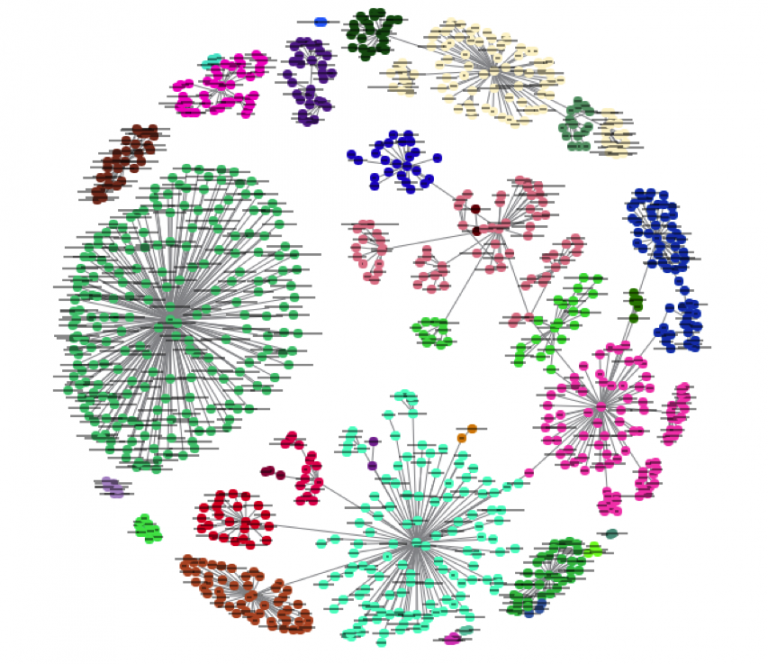

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
> 1. Calculate the distance between the query example and the current example from the data.
> 2. Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. Return the most frequent of the K labels



## Import Libraries
**Import the usual libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Get the Data
Read the 'cancer csv' file into a dataframe

In [ ]:

cancer_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/cancer.csv')
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave_points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


##About the dataset
Attribute Information:

Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


###Check the head of the dataframe.


In [ ]:
cancer_df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


###check for Nans

In [ ]:
cancer_df.isna().sum()

diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

In [ ]:
cancer_df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [ ]:
#change the 'diagnosis' feature from string to binary
cancer_df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [ ]:
cancer_df.diagnosis.replace({'B':0, 'M':1}, inplace=True)
cancer_df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# EDA

Since this data is artificial, and we want to concentrate on KNN and not on EDA we'll just do a quick EDA.


In [ ]:
counts = cancer_df.diagnosis.value_counts()
percentage = [str(round(count/counts.sum(),2)*100)+'%' for count in counts ]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Benign', 'Malignant'],
    y=counts,
    marker_color=['green','black'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    width=600,
    title='Tumor Diagnosis', 
    yaxis_title='Number of cases',
    )
fig.show()

##Split and scale the DF

##Feature Selection

In [ ]:
corr_df = cancer_df.corr()
corr_df

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})

In [ ]:
cols = corr_df.columns.to_list()
for i in range(len(cols)):
  print(cols[i], ': ', end=' ')
  for j in range(len(cols)):
    if abs(corr_df.iloc[i,j]) >= 0.85 and cols[i] is not cols[j] :
      print(cols[j], end=', ')
  print()

diagnosis :  
radius :  perimeter, area, 
texture :  
perimeter :  radius, area, concave_points, 
area :  radius, perimeter, 
smoothness :  
compactness :  concavity, 
concavity :  compactness, concave_points, 
concave_points :  perimeter, concavity, 
symmetry :  
fractal_dimension :  


- radius, perimeter and area are highly correlated.
- Perimter has the stronger correalation to the target and should remain in the DF.

- concavity, concave_points are highly correlated.
- concave_points has the stronger correalation to the target and should remain in the DF.

- concavity, compactness are highly correlated.
- concavity has the stronger correalation to the target and should remain in the DF.


- perimeter , concave_points are highly correlated.
- concave_points has the stronger correalation to the target and should remain in the DF.

In [ ]:
cancer_df.drop(['radius','area', 'compactness'], axis=1, inplace=True)


In [ ]:
dimensions = [dict(label=x, values=cancer_df[x]) for x in cancer_df.columns if x != 'diagnosis']
fig = go.Figure()
fig.add_trace(go.Splom(dimensions=dimensions))
fig.update_traces(
    marker=dict(color=cancer_df['diagnosis'],
                size=5,
                colorscale='Bluered',
                line=dict(width=0.5,
                color='rgb(230,230,230)')),
    text=['Benign' if diagnosis==0 else 'Malignant' for diagnosis in cancer_df['diagnosis']]
    #diagonal=dict(visible=True)
)
fig.update_layout(
    font=dict(
        family="monospace",
        size=8,
        color="RebeccaPurple"
    ),

    height=900
)
fig.show()


Feature importance

In [ ]:
X = cancer_df.drop('diagnosis', axis=1)
y = cancer_df.diagnosis

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_}, index=X.columns)
feat_importances_df.sort_values(by='feature_importance', ascending=False)

,feature_importance
concave_points,0.676178
perimeter,0.093099
texture,0.079283
concavity,0.062361
smoothness,0.040550
symmetry,0.026846
fractal_dimension,0.021683


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X, y)
scores = pd.Series(chi_selector.scores_.tolist()) 
p_values = pd.Series(chi_selector.pvalues_.tolist()) 
selected_df = pd.DataFrame({'univariate_score':scores, 'p_values':p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)
univariate = selected_df.sort_values(by='univariate_score', ascending=False)
univariate

,univariate_score,p_values
perimeter,2011.102864,0.000000e+00
texture,93.897508,3.322922e-22
concavity,19.712354,9.001757e-06
concave_points,10.544035,1.165636e-03
symmetry,0.257380,6.119260e-01
smoothness,0.149899,6.986316e-01
fractal_dimension,0.000074,9.931222e-01


In [ ]:
X.drop(['fractal_dimension','smoothness','symmetry'], axis=1, inplace=True)


In [ ]:
#scale the DF
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,texture,perimeter,concavity,concave_points
0,-2.073335,1.269934,2.652874,2.532475
1,-0.353632,1.685955,-0.023846,0.548144
2,0.456187,1.566503,1.363478,2.037231
3,0.253732,-0.592687,1.915897,1.451707
4,-1.151816,1.776573,1.371011,1.428493


In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4321)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)


,texture,perimeter,concavity,concave_points,diagnosis
530,-0.402501,-0.662299,-0.451719,-0.116567,0
97,0.151341,-1.229900,-1.029135,-1.057093,0
263,0.021025,0.330797,-0.586434,-0.527465,1
178,0.681912,-0.410215,-1.094848,-1.214049,0
359,-0.225644,-1.324225,-0.774633,-0.899156,0
471,2.059536,-0.622756,-0.817697,-0.648697,0
356,-0.162813,-0.283349,0.090781,0.183417,0
254,0.009390,1.422337,0.616458,0.954141,1
93,-0.230298,-0.221152,-0.615938,-0.544747,0
286,0.342161,-0.580742,-0.289509,-0.283970,0


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)

**Fit this KNN model to the training data.**

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Get predictions of the train dataset

In [ ]:
prediction = knn.predict(X_train)

In [ ]:
y_train_pred = pd.Series(prediction, name='prediction', index=y_train.index)

train_results = pd.DataFrame(data={'prediction':y_train_pred, 'actual':y_train})
train_results

,prediction,actual
530,0,0
97,0,0
263,1,1
178,0,0
359,0,0
...,...,...
235,0,0
146,1,1
186,1,1
248,0,0


In [ ]:
len_correct_rows = train_results.loc[train_results.prediction==train_results.actual].any(axis=1).count()
accuracy = round(len_correct_rows/len(train_results),3)
accuracy

1.0

# Predictions and Evaluations
We should first evaluate how good the model does on the training set. Due to the short time we've got Let's use the test set to evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
y_pred = knn.predict(X_test)

y_test_pred = pd.Series(y_pred, name='prediction', index=y_test.index)

test_results = pd.DataFrame(data={'prediction':y_test_pred, 'actual':y_test})
test_results

,prediction,actual
549,0,0
308,0,0
213,1,1
477,0,0
76,0,0
...,...,...
99,1,1
302,1,1
50,0,0
31,0,1


**Create a confusion matrix and classification report.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[104   4]
 [  9  54]]


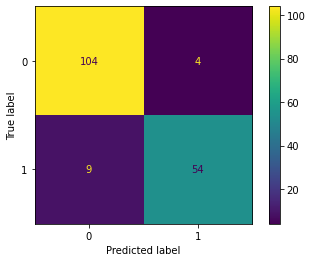

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, values_format='0.0f')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.93      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [ ]:
import numpy as np
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

In [ ]:
trace = go.Scatter(
    x=[i for i in range(1,50)],
    y=error_rate,
    mode='markers+lines', 
)
fig = go.Figure(trace)
fig.update_layout(
    title='Error by K Value', 
    xaxis_title='k neighboors',
    yaxis_title='Error rate'

)
fig.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(knn.score(X_train, y_train))

[[106   2]
 [  8  55]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       108
           1       0.96      0.87      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

0.9346733668341709


# **Start working on Assignment 6**

## Get the Data

**NOTE - you can ausme that there are no Nans or duplicates and that the data set is scaled**




**1. Read the 'iris.csv' file into a dataframe**
'https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/iris.csv'


In [ ]:
iris_df = 

SyntaxError: ignored

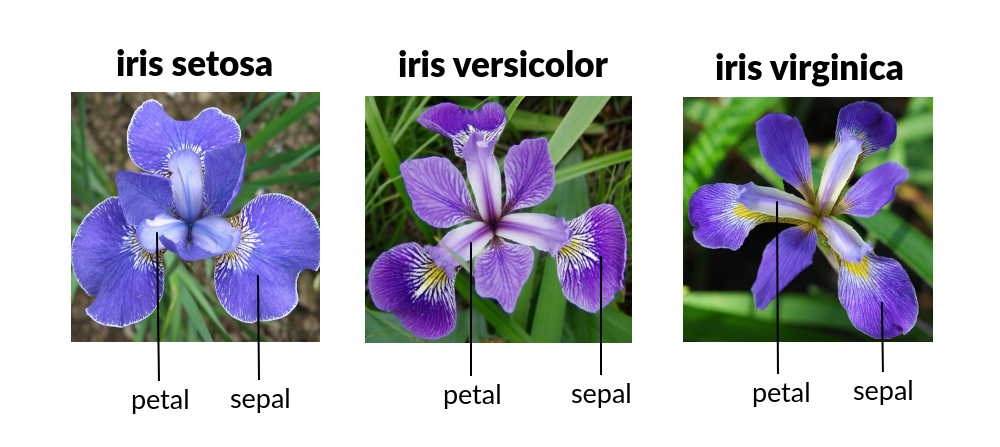

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

**2.Check the head and info of the dataframe.**

# EDA

**3. Create a pairplot with a different color for each species.**

In [ ]:
dimensions = [.............]
colors = iris_df...............
fig = go.Figure()
fig.add_trace(go.Splom(dimensions=dimensions))
.....
.....


....
fig.show()


**4. How many cases of each species?**


In [ ]:
counts = 

percentage = 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=???????
    y=?????????
    marker_color=['blue','white','red'],
    text=????????????
    textposition='outside',
))
fig.update_layout(
    width=600,
    title='Iris distribition', 
    yaxis_title='Number of cases',
    )
fig.show()

# Create Dummy Vars

**5. create Dummy variables out of the categorical ones, add them to the DF**

------

In [ ]:


iris_df.head()

# Select Features 
**5. run feature importance test.**

You are supposed to get an error...
Be creative and try to find a way to avoid it

In [ ]:
X = iris_df.drop(['Virginica','Versicolor','variety'],axis=1)
y = iris_df[['Virginica','Versicolor']]

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
???
feat_importances_df = ???
feat_importances_df.sort_values(????????)

In [ ]:
???
feat_importances_df = ???
feat_importances_df.sort_values(????????)

should you drop sepal_length, sepal_width???

wait and see what other tests say....

**6. Run Univariate Selection**




In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_selector = SelectKBest(chi2, k=4)
chi_selector.fit(X, y)



In [ ]:
scores = 
p_values = 


In [ ]:
iris_df.drop(['sepal_width','sepal_length'],axis=1, inplace=True)

# Train Test Split

**6. Use train_test_split to split your data into a training set and a testing set.**

In [ ]:


#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = 
train_df.head(10)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

7. **Create a KNN model instance with n_neighbors=1**

In [ ]:
knn =??????

**8.a. Fit this KNN model to the training data.**

**8.b. Use the train data to predict the flower species**


In [ ]:
prediction = ?
prediction[:10]

**8.c. Now that you have the predictions, create a 'train_results' DF and add the predicted variety and the actual variety. Also,calculate the model accuracy on the test_results data**

In [ ]:

train_results.head(10)

In [ ]:

accuracy



# Evaluation
Let's evaluate our KNN model!

**9. Use the predict method to predict values using your KNN model of X_test.**


In [ ]:
prediction = 


**10. Now that you have the predictions, create a 'test_results' DF and add the predicted variety and the actual variety. Also,calculate the model accuracy on the test_results data** 

The variety feature has the label name: 'Virginica', 'Versicolor' or 'Setosa' as value

In [ ]:

test_results.head(10)

In [ ]:

accuracy

**11. plot a cunfusion matrix and a classification report.**

Note that this is a multlabel confusion matrix so you would have to rearrange the results and preetify the plot.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(????,?????, target_names=['Virginica','Versicolor','Setosa']))
print('-----------------------------------------------------------')
print(confusion_matrix(???,???))

**12. Convert the confusion matrix to a DF, print and plot it's heat map.** 

In [ ]:

cm_df

In [ ]:
fig = go.Figure()
???
???
fig.add_trace(trace)

# Choosing a K Value
**13. Find the optimal number of neighboors**

You would have to change the code we used in class to match a multi-class classification. 


In [ ]:
import numpy as np
error_rate = []
???
    

**Now create the following plot using the information from your for loop.**

In [ ]:

?
?
?
fig.show()

## Retrain with new K Value

**15. Retrain your model with the best K value (up to you to decide what you want) and re-print the classification report**

Hint - you should get a perfect classifier

In [ ]:
knn =

????
print(classification_report(????,????))

# End.